# Inference

In [10]:
import bnlearn
import pandas as pd
import read_bayesnet
from read_bayesnet import BayesianNetwork, Variable
from time import time

### Reading a file and getting its properties

In [11]:
bn = BayesianNetwork(file='bifs/asia.bif') 
for v in bn.variables:
    print('node : ',v.name,'\nparents : ',v.parents,'\nmarkov blanket : ',v.markov_blanket,'\nprobs : ',v.probabilities,'\n')

node :  asia 
parents :  [] 
markov blanket :  ['tub', 'asia'] 
probs :  {'yes': 0.01, 'no': 0.99} 

node :  tub 
parents :  ['asia'] 
markov blanket :  ['tub', 'either', 'asia'] 
probs :  {('yes',): {'yes': 0.05, 'no': 0.95}, ('no',): {'yes': 0.01, 'no': 0.99}} 

node :  smoke 
parents :  [] 
markov blanket :  ['bronc', 'smoke', 'lung'] 
probs :  {'yes': 0.5, 'no': 0.5} 

node :  lung 
parents :  ['smoke'] 
markov blanket :  ['either', 'smoke', 'lung'] 
probs :  {('yes',): {'yes': 0.1, 'no': 0.9}, ('no',): {'yes': 0.01, 'no': 0.99}} 

node :  bronc 
parents :  ['smoke'] 
markov blanket :  ['bronc', 'dysp', 'smoke'] 
probs :  {('yes',): {'yes': 0.6, 'no': 0.4}, ('no',): {'yes': 0.3, 'no': 0.7}} 

node :  either 
parents :  ['lung', 'tub'] 
markov blanket :  ['lung', 'either', 'tub', 'xray', 'dysp'] 
probs :  {('yes', 'yes'): {'yes': 1.0, 'no': 0.0}, ('no', 'yes'): {'yes': 1.0, 'no': 0.0}, ('yes', 'no'): {'yes': 1.0, 'no': 0.0}, ('no', 'no'): {'yes': 0.0, 'no': 1.0}} 

node :  xray 
par

# Running the algorithm with different iterations

In [67]:
start = time()
res, df = bn.gibbs_sampling(iterations=1, query=True)
end = time()
round(end-start,2)

0.17

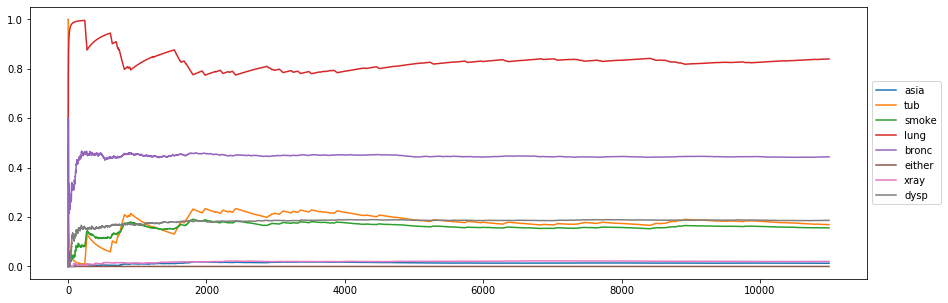

1.78

In [69]:
start = time()
res, df = bn.gibbs_sampling(iterations=10000, query=False)
end = time()

df.plot(figsize=(15,5))
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

round(end-start,2)

In [66]:
df.loc[10,'smoke']

0.51

In [9]:
res

{'asia': {'yes': 0.01, 'no': 0.98},
 'tub': {'yes': 0.16, 'no': 0.84},
 'smoke': {'yes': 0.85, 'no': 0.15},
 'lung': {'yes': 0.85, 'no': 0.15},
 'bronc': {'yes': 0.57, 'no': 0.43},
 'either': {'yes': 1.0, 'no': 0.0},
 'xray': {'yes': 0.98, 'no': 0.02},
 'dysp': {'yes': 0.82, 'no': 0.18}}

In [4]:
res

{}

# Running the algorithms many times so it uses different samples

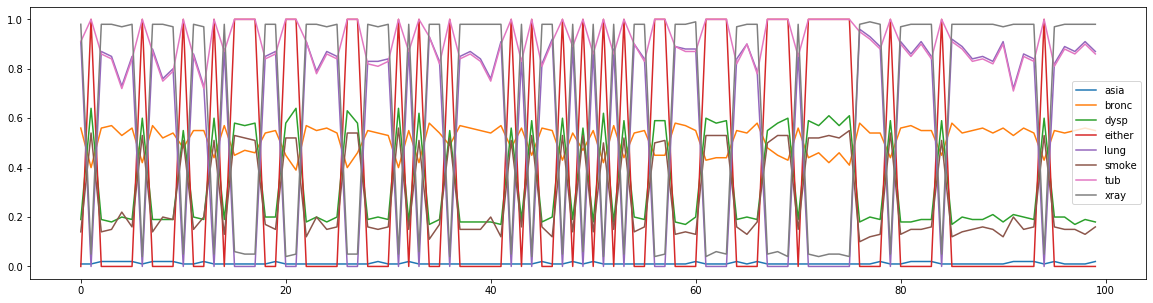

In [62]:
df = pd.DataFrame()

monitor = bn.generate_monitor()

for i in range(100):
    results, _ = bn.gibbs_sampling(iterations=1000, debug=False)
    df = df.append(results,ignore_index=True)
    print(i, end='\r')

for m in monitor:
    df[m] = df[m].apply(lambda x : x[monitor[m]])
df.plot(figsize=(20,5))

# Using the bnlearn package

In [70]:
DAG = bnlearn.import_DAG('bifs/asia.bif', verbose=0) # read file

df = bnlearn.sampling(DAG, n=11000, verbose=0) # get samples

for var in df.columns:
    print(df.groupby(var).size().div(len(df)), '\n')




  0%|          | 0/8 [00:00<?, ?it/s]

Generating for node: smoke:   0%|          | 0/8 [00:00<?, ?it/s]

Generating for node: bronc:   0%|          | 0/8 [00:00<?, ?it/s]

Generating for node: bronc:  25%|██▌       | 2/8 [00:00<00:02,  2.62it/s]

Generating for node: lung:  25%|██▌       | 2/8 [00:00<00:02,  2.62it/s] 

Generating for node: lung:  38%|███▊      | 3/8 [00:01<00:02,  2.08it/s]

Generating for node: asia:  38%|███▊      | 3/8 [00:01<00:02,  2.08it/s]

Generating for node: tub:  38%|███▊      | 3/8 [00:01<00:02,  2.08it/s] 

Generating for node: tub:  62%|██████▎   | 5/8 [00:02<00:01,  2.24it/s]

Generating for node: either:  62%|██████▎   | 5/8 [00:02<00:01,  2.24it/s]

Generating for node: either:  75%|███████▌  | 6/8 [00:02<00:01,  1.83it/s]

Generating for node: dysp:  75%|███████▌  | 6/8 [00:02<00:01,  1.83it/s]  

Generating for node: dysp:  88%|████████▊ | 7/8 [00:03<00:00,  1.62it/s]

Generating for node: xray:  88%|████████▊ | 7/8 [00:03<00:00,  1.62it/s]

Gene

smoke
0    0.498091
1    0.501909
dtype: float64 

bronc
0    0.444
1    0.556
dtype: float64 

lung
0    0.057273
1    0.942727
dtype: float64 

asia
0    0.009273
1    0.990727
dtype: float64 

tub
0    0.011545
1    0.988455
dtype: float64 

either
0    0.067818
1    0.932182
dtype: float64 

dysp
0    0.425455
1    0.574545
dtype: float64 

xray
0    0.111727
1    0.888273
dtype: float64 



In [ ]:
for i in range(1,len(df.index)): # for every sample
    print(i, end='\r')
    
    tmp.append(c)
    df_prob.loc[len(df_prob)] = tmp

df_prob.plot(figsize=(15,5))